# Think Bayes

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import pandas as pd

from scipy.stats import poisson

# import classes from thinkbayes
from thinkbayes import Pmf, Cdf, Suite, Joint

import thinkbayes
from thinkbayes import thinkplot

import pymc3 as pm
import theano.tensor as T

### Fake data

In [3]:
n = 60
t1 = 30
t2 = n-t1
lam1 = 4
lam2 = 2

2

In [4]:
before = poisson(lam1).rvs(t1)

array([4, 4, 4, 3, 5, 5, 4, 2, 3, 3, 2, 4, 4, 7, 4, 4, 4, 1, 4, 7, 7, 5,
       3, 7, 3, 3, 5, 6, 2, 3])

In [5]:
after = poisson(lam2).rvs(t2)

array([3, 1, 2, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 1, 2, 2, 3, 1, 3, 1, 4, 2,
       6, 1, 2, 0, 3, 1, 3, 1])

In [6]:
data = np.concatenate([before, after])

array([4, 4, 4, 3, 5, 5, 4, 2, 3, 3, 2, 4, 4, 7, 4, 4, 4, 1, 4, 7, 7, 5,
       3, 7, 3, 3, 5, 6, 2, 3, 3, 1, 2, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 1,
       2, 2, 3, 1, 3, 1, 4, 2, 6, 1, 2, 0, 3, 1, 3, 1])

### Grid algorithm

In [7]:
class Change(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: array of counts
        hypo: t, lam1, lam2
        """
        # FILL THIS IN
        return 1

### MCMC

To implement this model in PyMC, see Chapter 1 of [Bayesian Methods for Hackers](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC2.ipynb)
and this example from [Computational Statistics in Python](http://people.duke.edu/~ccc14/sta-663-2016/16C_PyMC3.html#Changepoint-detection)

In [8]:
stop

NameError: name 'stop' is not defined

### Real data

Some real data, based on [this analysis from the Baltimore Sun](http://www.baltimoresun.com/news/maryland/crime/bs-md-ci-violence-stats-20181018-story.html)

In [14]:
# !wget https://raw.githubusercontent.com/baltimore-sun-data/2018-shootings-analysis/master/BPD_Part_1_Victim_Based_Crime_Data.csv

In [32]:
df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv', parse_dates=[0])
df = df.sample(1000)
df.to_csv('../../tests/data/BPD_Part_1_Victim_Based_Crime_Data.csv')

In [33]:
df.shape

(1000, 16)

In [34]:
shootings = df[df.Description.isin(['HOMICIDE', 'SHOOTING']) & (df.Weapon == 'FIREARM')]
shootings.shape

(10, 16)

In [35]:
grouped = shootings.groupby('CrimeDate')

In [36]:
counts = grouped['Total Incidents'].sum()
counts.head()

CrimeDate
2013-02-05    1.0
2013-03-31    1.0
2013-05-15    1.0
2014-10-09    1.0
2015-03-15    1.0
Name: Total Incidents, dtype: float64

In [37]:
index = pd.date_range(counts.index[0], counts.index[-1])

DatetimeIndex(['2013-02-05', '2013-02-06', '2013-02-07', '2013-02-08',
               '2013-02-09', '2013-02-10', '2013-02-11', '2013-02-12',
               '2013-02-13', '2013-02-14',
               ...
               '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16',
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-22'],
              dtype='datetime64[ns]', length=2056, freq='D')

In [30]:
counts = counts.reindex(index, fill_value=0)
counts.head()

2013-05-22    1.0
2013-05-23    0.0
2013-05-24    0.0
2013-05-25    0.0
2013-05-26    0.0
Freq: D, Name: Total Incidents, dtype: float64

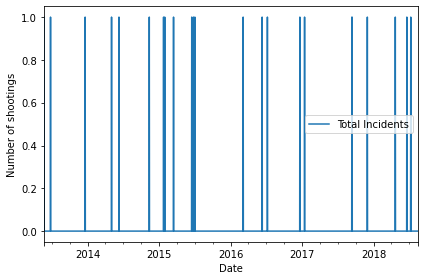

In [31]:
counts.plot()
thinkplot.decorate(xlabel='Date',
                   ylabel='Number of shootings')